In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from geopy.distance import geodesic
from mpl_toolkits.basemap import Basemap

In [2]:
technicians_df = pd.read_csv('technicians.csv')


In [3]:
def calculate_distance(user_lat, user_lon, tech_lat, tech_lon):
    user_location = (user_lat, user_lon)
    tech_location = (tech_lat, tech_lon)
    return geodesic(user_location, tech_location).kilometers

In [15]:
def recommend_technicians(user_lat, user_lon, user_field, k=6):
    filtered_technicians = technicians_df[technicians_df['Technician Field'] == user_field]
    
    filtered_technicians['distance_km'] = filtered_technicians.apply(
        lambda row: calculate_distance(user_lat, user_lon, row['Latitude'], row['Longitude']), axis=1)
    if filtered_technicians.empty:
        return "No technicians found in the specified field."
    X = filtered_technicians[['Latitude', 'Longitude']]
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(X)
    user_data = [[user_lat, user_lon]]
    _, indices = knn.kneighbors(user_data)
    recommended_technicians = filtered_technicians.iloc[indices[0]]
    return recommended_technicians[['Technician Name', 'Technician Field', 'Technician Location', 'Latitude', 'Longitude', 'distance_km']]


In [16]:
user_latitude = 10.9233
user_longitude = 79.2864
user_field = "Electrician"  


In [17]:
recommended_technicians = recommend_technicians(user_latitude, user_longitude, user_field)

C:\Users\polis\AppData\Local\Temp\ipykernel_18368\3679237247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_technicians['distance_km'] = filtered_technicians.apply(
C:\Users\polis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [18]:
recommended_technicians

,Technician Name,Technician Field,Technician Location,Latitude,Longitude,distance_km
237,Arjun Verma,Electrician,Kumbakonam,10.9591,79.3802,10.991343
583,Pari Parekh,Electrician,Kumbakonam,10.9591,79.3802,10.991343
445,Zoya Malhotra,Electrician,Kumbakonam,10.9591,79.3802,10.991343
4,Saanvi Patel,Electrician,Thanjavur,10.7860,79.1378,22.240757
901,Aarav Agarwal,Electrician,Thanjavur,10.7860,79.1378,22.240757
680,Krishna Jain,Electrician,Thanjavur,10.7860,79.1378,22.240757


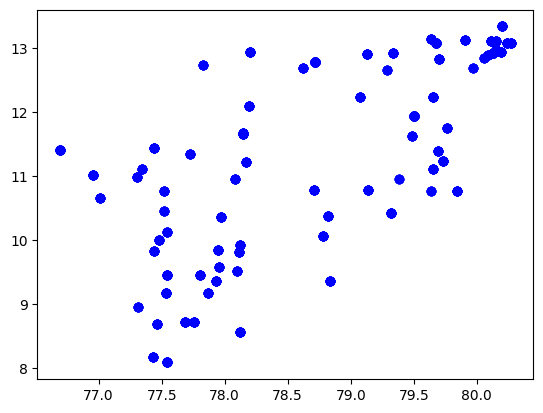

In [8]:
plt.scatter(technicians_df['Longitude'], technicians_df['Latitude'], color='blue', label='All Technicians')

In [9]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

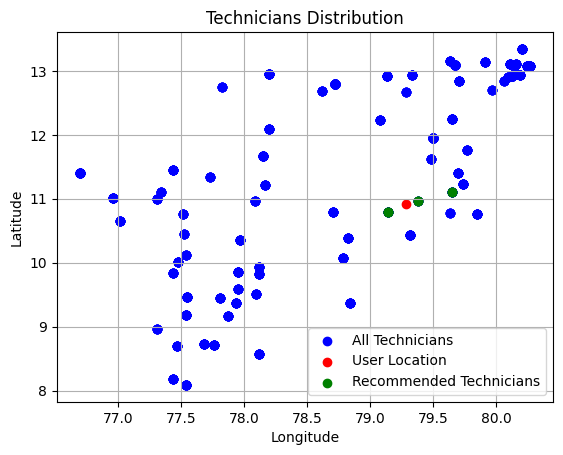

In [10]:
plt.scatter(technicians_df['Longitude'], technicians_df['Latitude'], color='blue', label='All Technicians')
plt.scatter(user_longitude, user_latitude, color='red', label='User Location')
plt.scatter(recommended_technicians['Longitude'], recommended_technicians['Latitude'], color='green', label='Recommended Technicians')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Technicians Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
def plot_technicians(locations, title):
    plt.figure(figsize=(10, 8))
    map = Basemap(projection='mill', llcrnrlat=8, urcrnrlat=13, llcrnrlon=76, urcrnrlon=80, resolution='l')
    map.drawcoastlines()
    map.drawcountries() 
    map.drawstates()
    x, y = map(locations['Longitude'].values, locations['Latitude'].values)
    map.scatter(x, y, marker='o', color='blue', label='Technicians')
    plt.title(title)
    plt.legend()
    plt.show()


In [12]:
def plot_recommendation(user_location, recommended_technicians, title):
    plt.figure(figsize=(10, 8))
    map = Basemap(projection='mill', llcrnrlat=8, urcrnrlat=13, llcrnrlon=76, urcrnrlon=80, resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    x, y = map(recommended_technicians['Longitude'].values, recommended_technicians['Latitude'].values)
    map.scatter(x, y, marker='o', color='green', label='Recommended Technicians')
    x_user, y_user = map(user_location[1], user_location[0])  # user_location is a tuple (latitude, longitude)
    map.scatter(x_user, y_user, marker='o', color='red', label='User')
    plt.title(title)
    plt.legend()
    plt.show()


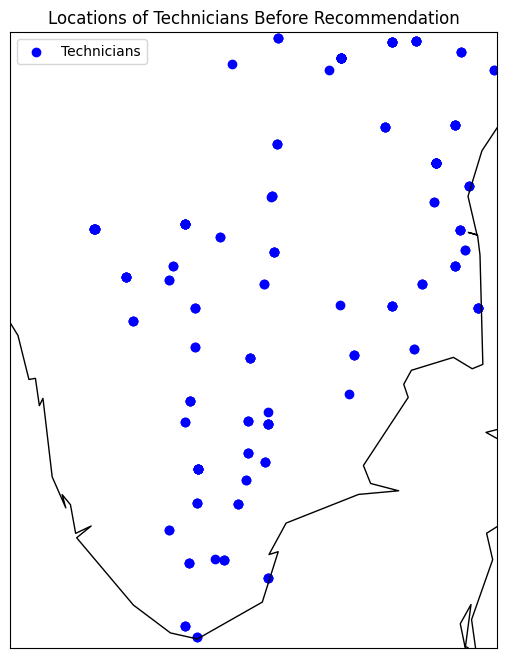

In [13]:
filtered_technicians = technicians_df[technicians_df['Technician Field'] == user_field]
plot_technicians(filtered_technicians, 'Locations of Technicians Before Recommendation')


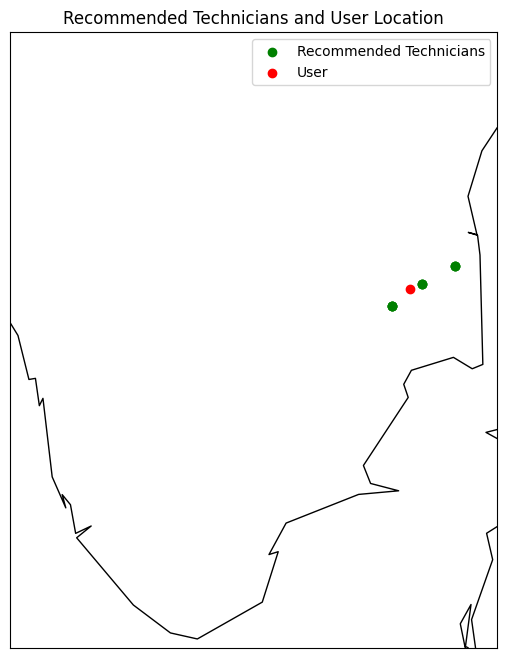

In [14]:
plot_recommendation((user_latitude, user_longitude), recommended_technicians, 'Recommended Technicians and User Location')
